<a href="https://colab.research.google.com/github/muhammad-rizvi/Heart-Failure-Prediction/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

# Load the CSV
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

# Preview the data
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


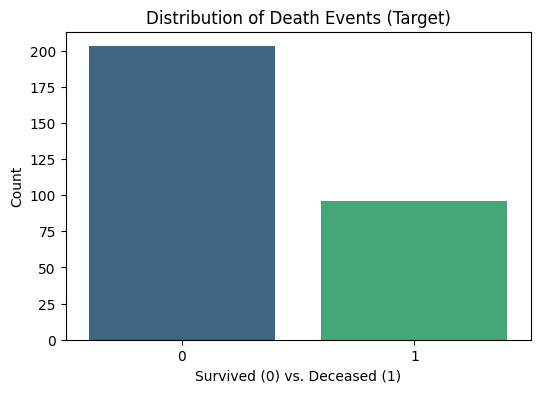

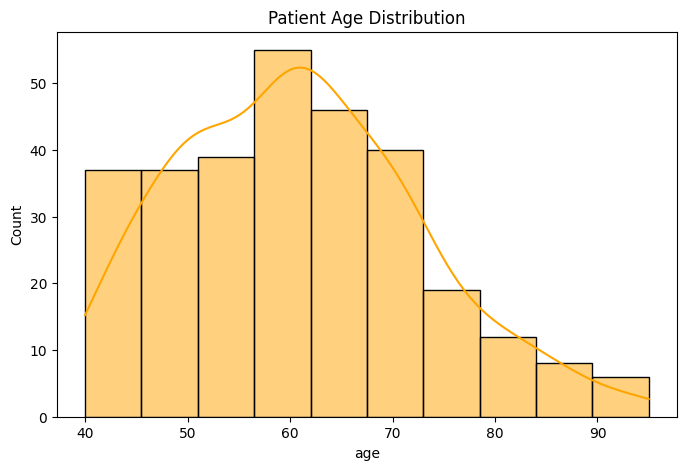

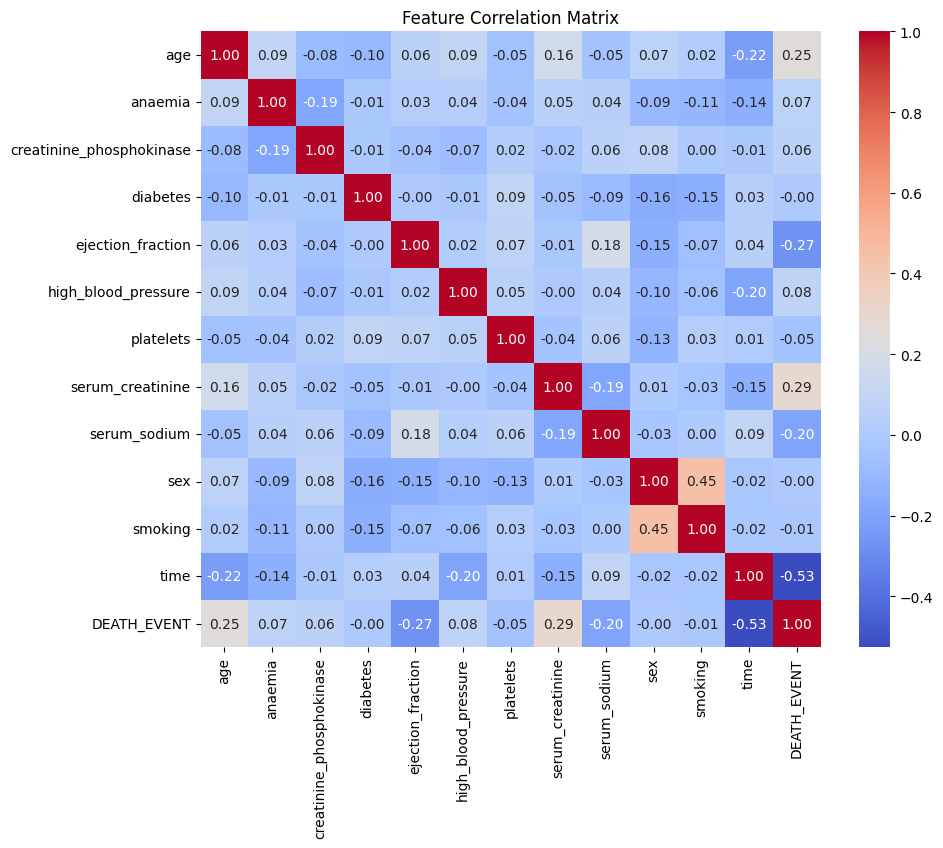

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=df, hue = 'DEATH_EVENT', palette='viridis', legend=False)
plt.title('Distribution of Death Events (Target)')
plt.xlabel('Survived (0) vs. Deceased (1)')
plt.ylabel('Count')
plt.show()

# 2. Histogram of age
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, color='orange')
plt.title('Patient Age Distribution')
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Basic Cleaning ---

# Show number of missing values
print("Missing Values Check:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nDuplicate rows found: {df.duplicated().sum()}")

# --- Mapping the 0s and 1s ---

# Labels for better readability in tables
df['sex_label'] = df['sex'].map({0: 'female', 1: 'male'})
df['smoking_label'] = df['smoking'].map({0: 'no', 1: 'yes'})

# --- Machine Learning ---

# Define Features (X) and Target (y)
X = df.drop(['DEATH_EVENT', 'sex_label', 'smoking_label'], axis=1)
y = df['DEATH_EVENT']

# Split data into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n--- Processing Complete ---")
print(f"Training set size: {X_train_scaled.shape[0]} patients")
print(f"Testing set size: {X_test_scaled.shape[0]} patients")

Missing Values Check:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Duplicate rows found: 0

--- Processing Complete ---
Training set size: 239 patients
Testing set size: 60 patients


--- Model Performance ---
Accuracy Score: 80.00%
ROC-AUC Score:  0.77

--- Detailed Classification Report ---
              precision    recall  f1-score   support

    Survived       0.76      0.97      0.85        35
    Deceased       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60



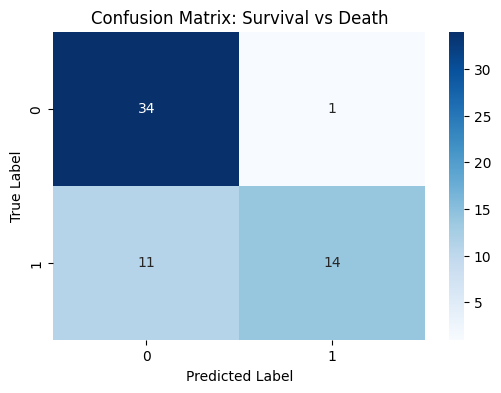

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

# 1. Initialize with a fixed random state for consistency
model_lr = LogisticRegression(max_iter=1000, random_state=42)

# 2. Train using SCALED data (Crucial for Logistic Regression)
model_lr.fit(X_train_scaled, y_train)

# 3. Predict using SCALED test data
y_pred = model_lr.predict(X_test_scaled)

# 4. Professional Evaluation
print("--- Model Performance ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2%}")
print(f"ROC-AUC Score:  {roc_auc_score(y_test, y_pred):.2f}")

print("\n--- Detailed Classification Report ---")
# This shows Precision (quality) and Recall (quantity)
print(classification_report(y_test, y_pred, target_names=['Survived', 'Deceased']))

# 5. Visual Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Survival vs Death')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

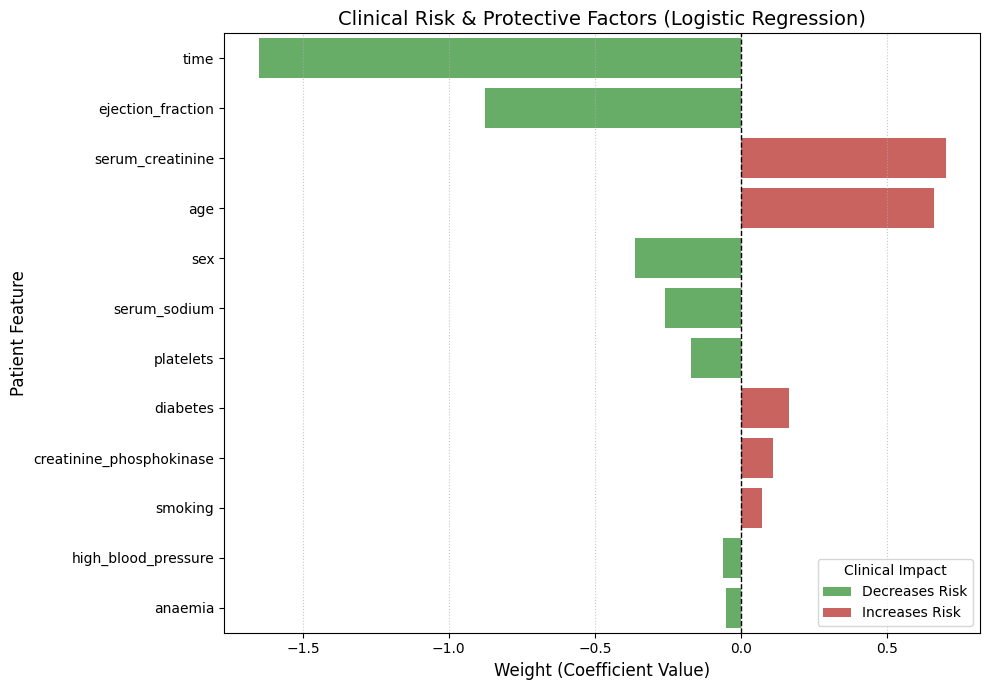

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract coefficients and names
coefficients = model_lr.coef_[0]
feature_names = X.columns

# 2. Create DataFrame with Directional Info
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Importance': np.abs(coefficients),
    'Impact': ['Increases Risk' if c > 0 else 'Decreases Risk' if c < 0 else 'Neutral' for c in coefficients]
})

# 3. Sort by Absolute Importance
fi_df = fi_df.sort_values(by='Abs_Importance', ascending=False)

# 4. Professional Visualization
plt.figure(figsize=(10, 7))
ax = sns.barplot(
    x='Coefficient',
    y='Feature',
    data=fi_df,
    hue='Impact', # Color-code by risk/protection
    dodge=False,
    palette={'Increases Risk': '#d9534f', 'Decreases Risk': '#5cb85c'} # Red/Green
)

# 5. Styling
plt.axvline(0, color='black', lw=1, ls='--') # Add a center line at 0
plt.title('Clinical Risk & Protective Factors (Logistic Regression)', fontsize=14)
plt.xlabel('Weight (Coefficient Value)', fontsize=12)
plt.ylabel('Patient Feature', fontsize=12)
plt.legend(title='Clinical Impact', loc='lower right')
plt.grid(axis='x', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

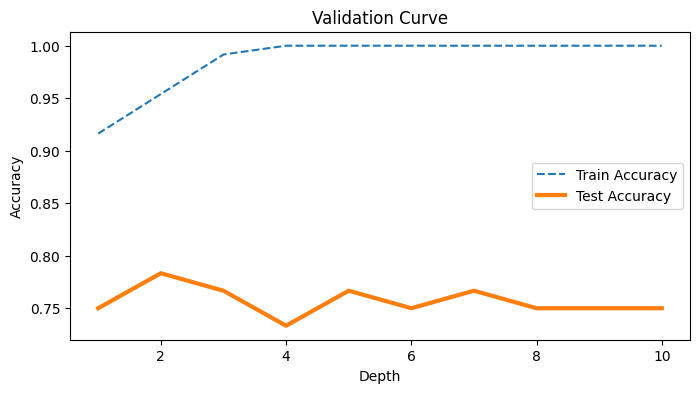

Finalizing model with Best Depth: 2

--- Final XGBoost Performance ---
              precision    recall  f1-score   support

    Survived       0.76      0.91      0.83        35
    Deceased       0.83      0.60      0.70        25

    accuracy                           0.78        60
   macro avg       0.80      0.76      0.76        60
weighted avg       0.79      0.78      0.78        60



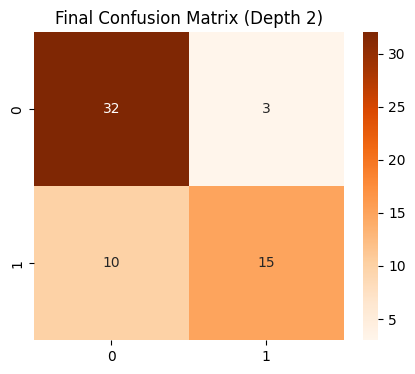

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- 1. THE SEARCH LOOP ---
depths = range(1, 11)
test_results = []
train_results = []

for d in depths:
    model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=d, random_state=42)
    model.fit(X_train_scaled, y_train)
    train_results.append(model.score(X_train_scaled, y_train))
    test_results.append(model.score(X_test_scaled, y_test))

# --- 2. THE VISUALIZATION ---
plt.figure(figsize=(8, 4))
plt.plot(depths, train_results, label='Train Accuracy', ls='--')
plt.plot(depths, test_results, label='Test Accuracy', lw=3)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.legend()
plt.show()

# --- 3. FINAL MODEL (The Winner) ---
best_d = depths[np.argmax(test_results)]
print(f"Finalizing model with Best Depth: {best_d}")

final_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=best_d, random_state=42)
final_model.fit(X_train_scaled, y_train)
y_pred_final = final_model.predict(X_test_scaled)

# --- 4. FINAL EVALUATION ---
print("\n--- Final XGBoost Performance ---")
print(classification_report(y_test, y_pred_final, target_names=['Survived', 'Deceased']))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt='d', cmap='Oranges')
plt.title(f'Final Confusion Matrix (Depth {best_d})')
plt.show()

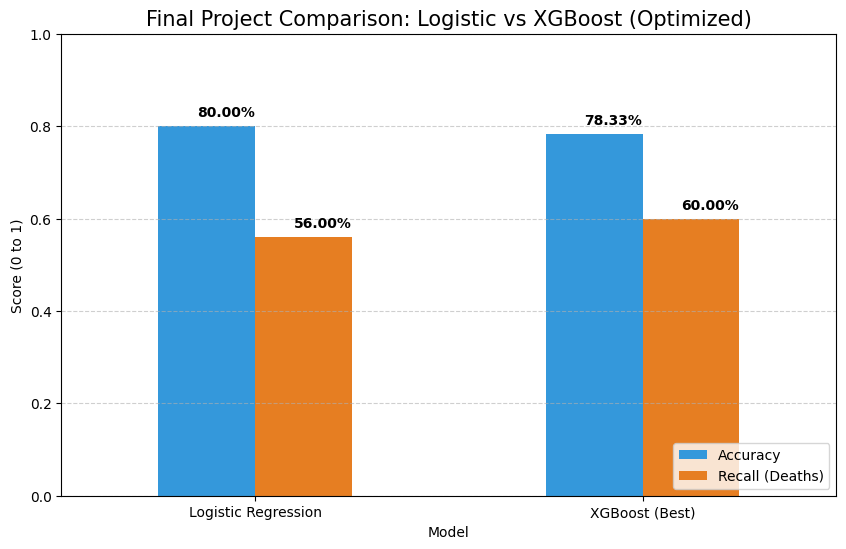

                 Model  Accuracy  Recall (Deaths)
0  Logistic Regression  0.800000             0.56
1       XGBoost (Best)  0.783333             0.60


In [23]:
from sklearn.metrics import recall_score

# 1. Gather all results into a single list
# We use 'y_pred' (your Logistic Regression) and 'y_pred_final' (your new best XGBoost)
model_names = ['Logistic Regression', 'XGBoost (Best)']

accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_final)
]

# Using recall_score with pos_label=1 (Deceased)
recalls = [
    recall_score(y_test, y_pred, pos_label=1),
    recall_score(y_test, y_pred_final, pos_label=1)
]

# 2. Create a Comparison DataFrame
summary_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Recall (Deaths)': recalls
})

# 3. Plot the final comparison
# We use a cleaner style and side-by-side bars
summary_df.set_index('Model').plot(kind='bar', figsize=(10,6), color=['#3498db', '#e67e22'])

plt.title('Final Project Comparison: Logistic vs XGBoost (Optimized)', fontsize=15)
plt.ylabel('Score (0 to 1)')
plt.ylim(0, 1.0) # Keeps the scale consistent
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding the actual numbers on top of the bars for clarity
for i, row in summary_df.iterrows():
    plt.text(i - 0.15, row['Accuracy'] + 0.02, f"{row['Accuracy']:.2%}", fontweight='bold')
    plt.text(i + 0.1, row['Recall (Deaths)'] + 0.02, f"{row['Recall (Deaths)']:.2%}", fontweight='bold')

plt.show()

print(summary_df)